In [27]:
from copy import copy

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings

sns.set_theme()
warnings.filterwarnings('ignore')

In [20]:
dfs = []
for w in ["win_1", "wfn_1", "win", "wfn", "wpgs", ""]:
    for problem in ["chemical_1_tower", "chemical_2_competition", "flow_stress_phip0.1", "friction_dyn_one-hot",
                    "friction_stat_one-hot", "nasa_battery_1_10min", "nasa_battery_2_20min"]:
        for seed in range(3):
            for opt in ["adam", "gaussian", "cmaes"]:
                w_text = f"{w}_" if len(w) > 0 else ""
                if os.path.exists(f"../results/ga_{problem}_{opt}_{w_text}{seed}.pickle"):
                    tmp_df = pd.read_csv(f"../results/ga_{problem}_{opt}_{w_text}{seed}.csv")
                    tmp_df["seed"] = seed
                    tmp_df["w"] = w if len(w) > 0 else "no w"
                    tmp_df["opt"] = opt
                    tmp_df["problem"] = problem
                    tmp_df["total_time"] = tmp_df["time"].cumsum().astype(int)
                    tmp_df["data_points"] = tmp_df["iteration"] * (
                        1000 if opt == "gaussian" else 4200 if opt == "adam" else 7400)
                    dfs.append(tmp_df)
                else:
                    continue
df = pd.concat(dfs, ignore_index=True)
df.head()

,iteration,max_fitness,test_accuracy,time,seed,w,opt,problem,total_time,data_points
0,0.0,0.120525,0.159155,0.000000,0,win_1,adam,chemical_1_tower,0,0.0
1,1.0,0.141260,0.159155,6.643298,0,win_1,adam,chemical_1_tower,6,4200.0
2,2.0,0.236337,0.159155,6.566624,0,win_1,adam,chemical_1_tower,13,8400.0
3,3.0,0.181248,0.159155,6.778724,0,win_1,adam,chemical_1_tower,19,12600.0
4,4.0,0.147690,0.159155,6.681152,0,win_1,adam,chemical_1_tower,26,16800.0


In [21]:
df1 = copy(df)
df2 = copy(df)
df1 = df.rename(columns={'test_accuracy': 'accuracy'})
df2 = df.rename(columns={'max_fitness': 'accuracy'})
df1 = df1.drop(columns=['max_fitness'])
df2 = df2.drop(columns=['test_accuracy'])
df1['when'] = "test"
df2['when'] = "train"
df = pd.concat([df1, df2], ignore_index=True)
df

,iteration,accuracy,time,seed,w,opt,problem,total_time,data_points,when
0,0.0,0.159155,0.000000,0,win_1,adam,chemical_1_tower,0,0.0,test
1,1.0,0.159155,6.643298,0,win_1,adam,chemical_1_tower,6,4200.0,test
2,2.0,0.159155,6.566624,0,win_1,adam,chemical_1_tower,13,8400.0,test
3,3.0,0.159155,6.778724,0,win_1,adam,chemical_1_tower,19,12600.0,test
4,4.0,0.159155,6.681152,0,win_1,adam,chemical_1_tower,26,16800.0,test
...,...,...,...,...,...,...,...,...,...,...
486523,1495.0,0.625456,0.931117,2,no w,gaussian,nasa_battery_2_20min,1710,1495000.0,train
486524,1496.0,0.617643,0.946938,2,no w,gaussian,nasa_battery_2_20min,1711,1496000.0,train
486525,1497.0,0.619312,0.940265,2,no w,gaussian,nasa_battery_2_20min,1712,1497000.0,train
486526,1498.0,0.613594,0.952973,2,no w,gaussian,nasa_battery_2_20min,1713,1498000.0,train


In [22]:
max_iter = df.groupby(["w", "opt", "seed"])["iteration"].transform("max")
final_df = df[df["iteration"] == max_iter]
final_df

,iteration,accuracy,time,seed,w,opt,problem,total_time,data_points,when
356,356.0,0.541526,12.888083,0,win_1,adam,chemical_1_tower,4333,1495200.0,test
1856,1499.0,0.416718,2.936540,0,win_1,gaussian,chemical_1_tower,4653,1499000.0,test
2213,356.0,0.582662,32.201075,0,win_1,cmaes,chemical_1_tower,13810,2634400.0,test
2570,356.0,0.727581,14.320116,1,win_1,adam,chemical_1_tower,4338,1495200.0,test
4070,1499.0,0.528376,3.484052,1,win_1,gaussian,chemical_1_tower,4658,1499000.0,test
...,...,...,...,...,...,...,...,...,...,...
480527,1499.0,0.964050,1.003035,1,no w,gaussian,nasa_battery_1_10min,1487,1499000.0,train
482027,1499.0,0.960403,0.986572,2,no w,gaussian,nasa_battery_1_10min,1496,1499000.0,train
483527,1499.0,0.742974,1.015620,0,no w,gaussian,nasa_battery_2_20min,1738,1499000.0,train
485027,1499.0,0.931967,1.165254,1,no w,gaussian,nasa_battery_2_20min,1746,1499000.0,train


In [33]:
reopt_dfs = []
for w in ["win_1", "wfn_1", "win", "wfn", "wpgs", ""]:
    for problem in ["chemical_1_tower", "chemical_2_competition", "flow_stress_phip0.1", "friction_dyn_one-hot",
                    "friction_stat_one-hot", "nasa_battery_1_10min", "nasa_battery_2_20min"]:
        for seed in range(3):
            for reopt in ["adam", "cmaes"]:
                for opt in ["adam", "gaussian", "cmaes", "none"]:
                    try:
                        tmp_df = pd.read_csv(f"../results/ga_{problem}_{opt}_{w}_reopt-{reopt}_{seed}.csv")
                        tmp_df["seed"] = seed
                        tmp_df["w"] = w if len(w) > 0 else "no w"
                        tmp_df["opt"] = opt
                        tmp_df["reopt"] = reopt
                        tmp_df["problem"] = problem
                        reopt_dfs.append(tmp_df)
                    except FileNotFoundError:
                        pass
reopt_df = pd.concat(reopt_dfs, ignore_index=True)
reopt_df["test_increase"] = reopt_df["test_accuracy"] - reopt_df["previous_test_accuracy"]
reopt_df["train_increase"] = reopt_df["max_fitness"] - reopt_df["previous_max_fitness"]
reopt_df.head()

,iteration,time,max_fitness,test_accuracy,previous_max_fitness,previous_test_accuracy,equation,seed,w,opt,reopt,problem,test_increase,train_increase
0,0,759.614355,0.520804,0.541232,-118003.360,-147806.56,o0 = <lambda>((0.24*sqrt(0.23*(0.51*(0.39*(0.3...,0,win_1,adam,adam,chemical_1_tower,147807.101232,118003.880804
1,0,553.889430,0.003013,0.014097,-117376.590,-144815.52,o0 = <lambda>(sqrt(-0.00*(1.01*i10*-0.00*i5))),0,win_1,gaussian,adam,chemical_1_tower,144815.534097,117376.593013
2,0,2698.550613,0.005615,0.012216,-117376.590,-144815.52,o0 = <lambda>(sqrt(0.00*(0.01*i10*-0.01*i5))),0,win_1,gaussian,cmaes,chemical_1_tower,144815.532216,117376.595615
3,0,2480.961821,0.534342,0.576105,-117388.410,-145510.56,o0 = <lambda>((0.12*log(0.30*(1.10*sin(0.93*sq...,0,win_1,cmaes,cmaes,chemical_1_tower,145511.136105,117388.944342
4,0,754.432121,0.697772,0.728476,-117984.305,-142904.88,o0 = <lambda>((0.02*(2.89*(0.88*i5-2.11*i8)+2....,1,win_1,adam,adam,chemical_1_tower,142905.608476,117985.002772


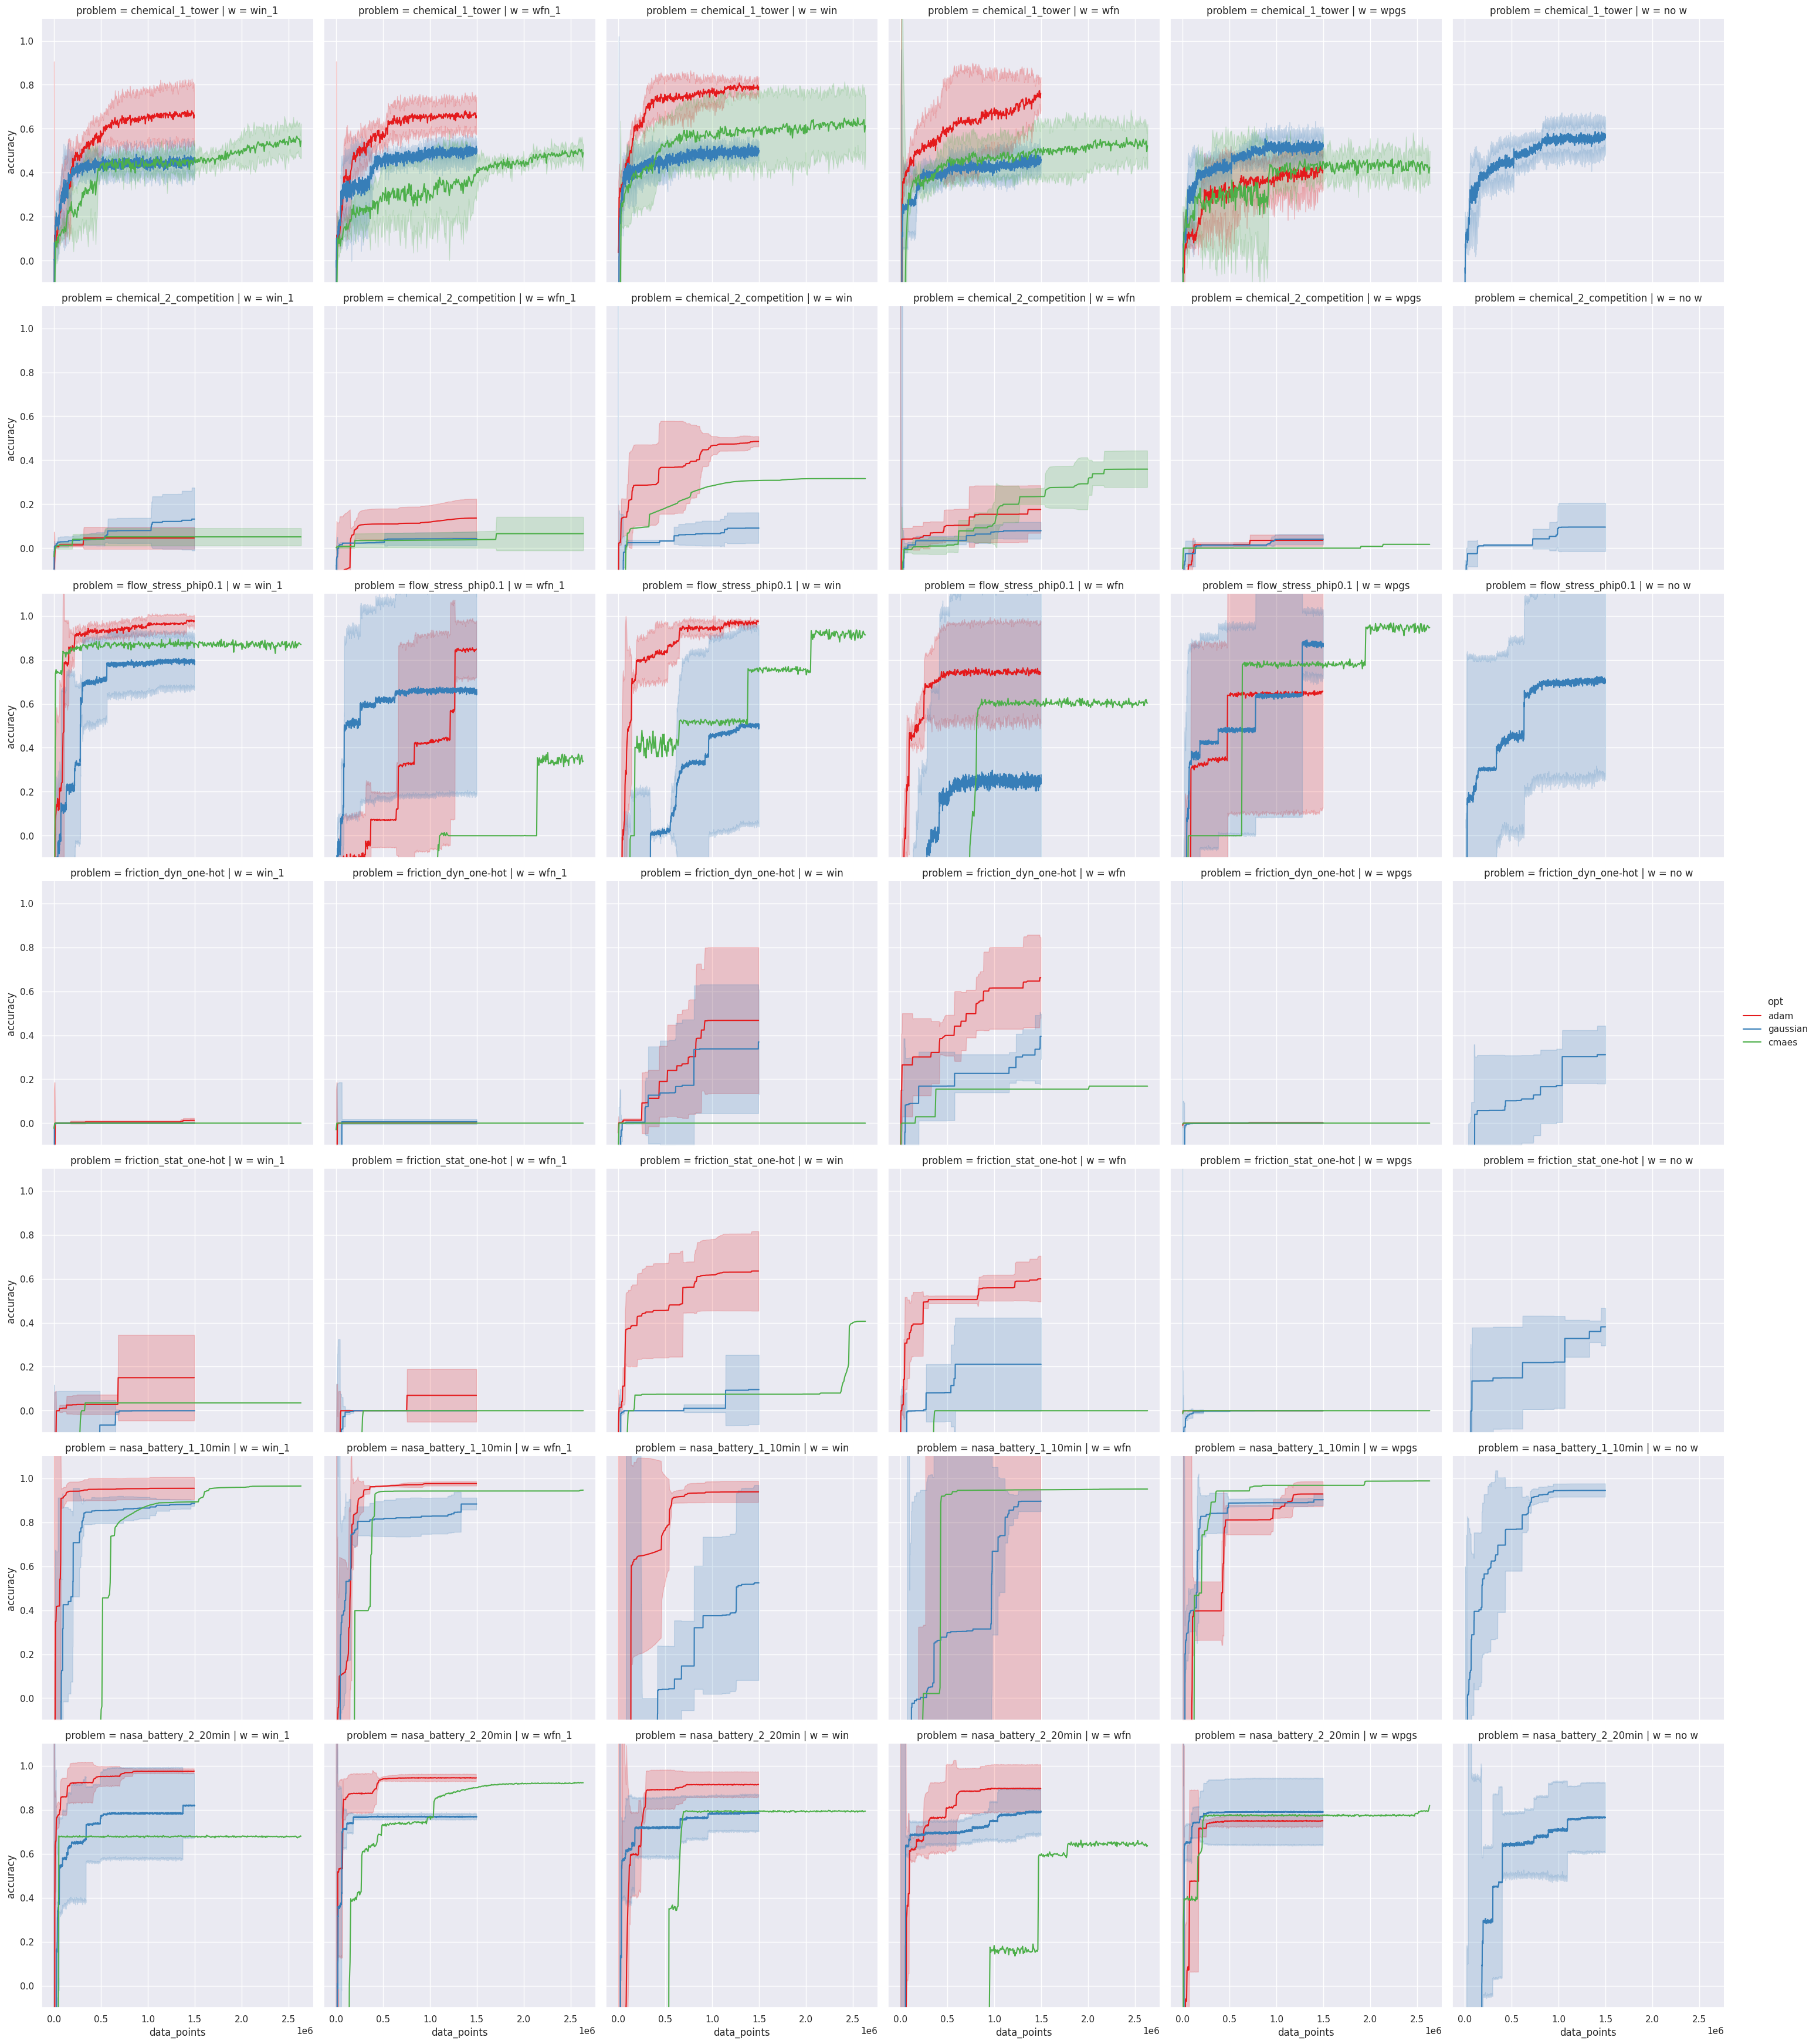

In [28]:
sns.relplot(data=df[df["when"] == "train"], x="data_points", y="accuracy", hue="opt", col="w",
            row="problem", errorbar="sd", kind="line", palette="Set1")
plt.ylim(-.1, 1.1)
plt.show()

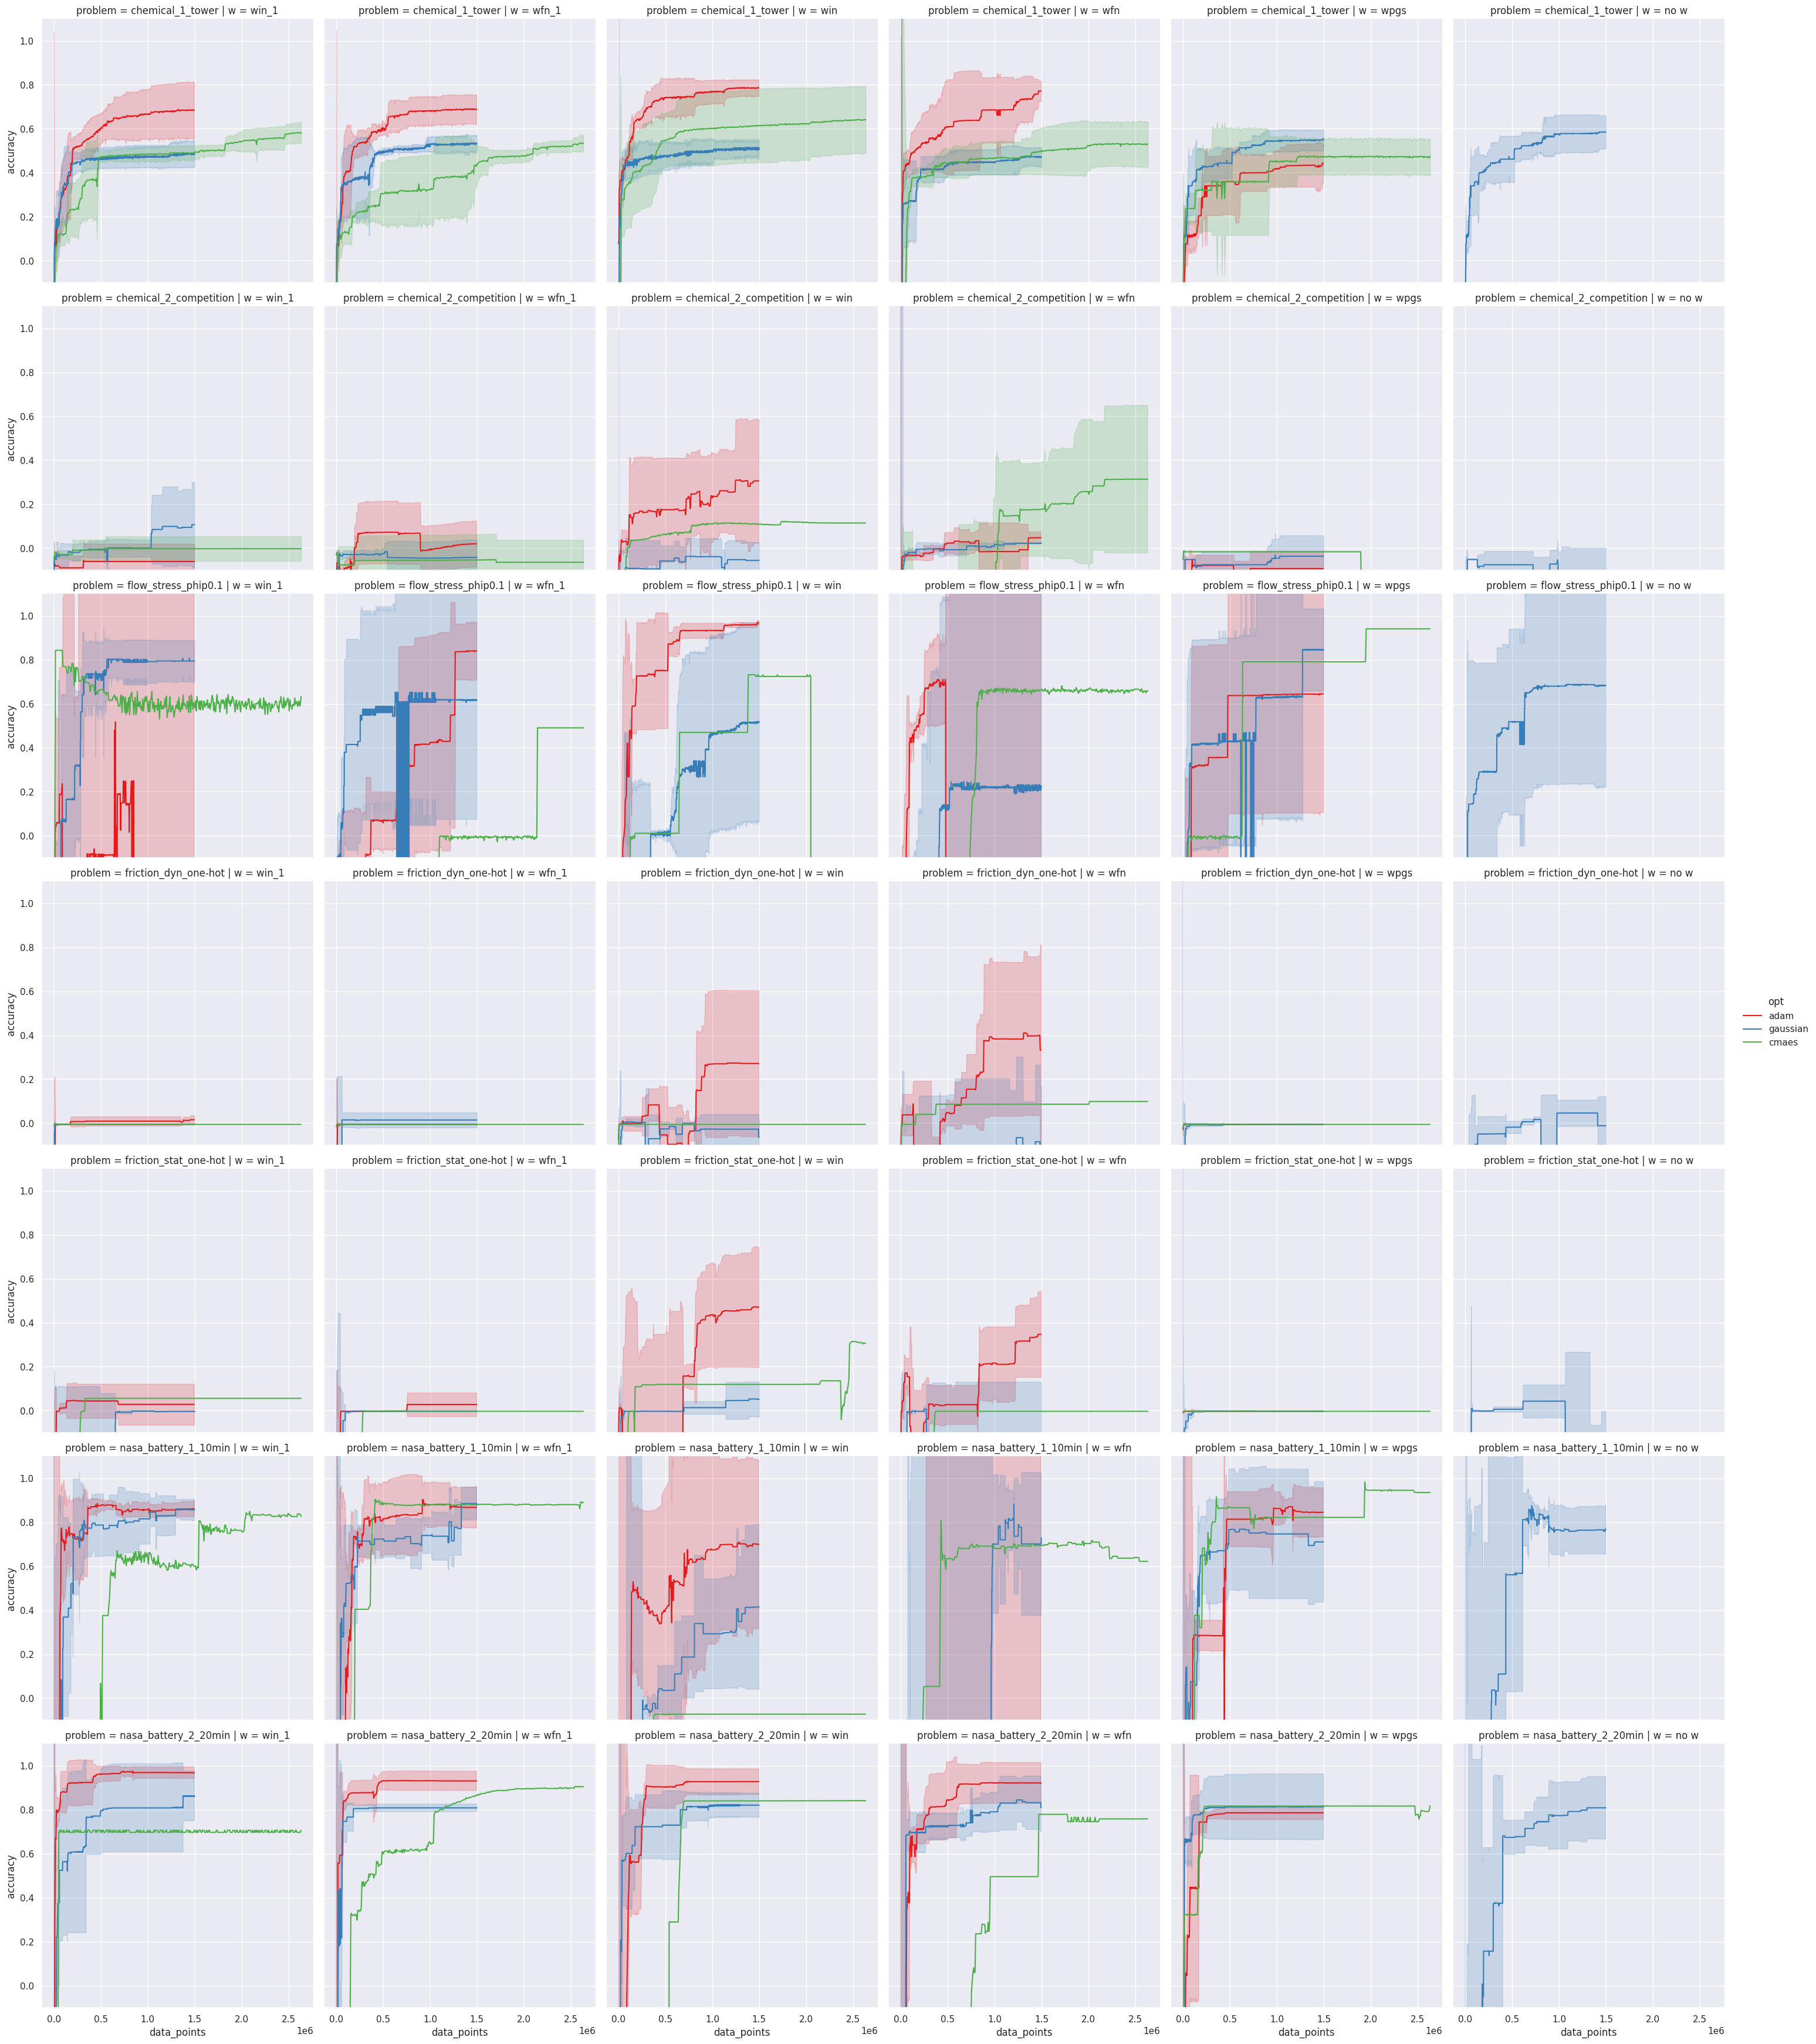

In [29]:
sns.relplot(data=df[df["when"] == "test"], x="data_points", y="accuracy", hue="opt", col="w",
            row="problem", errorbar="sd", kind="line", palette="Set1")
plt.ylim(-.1, 1.1)
plt.show()

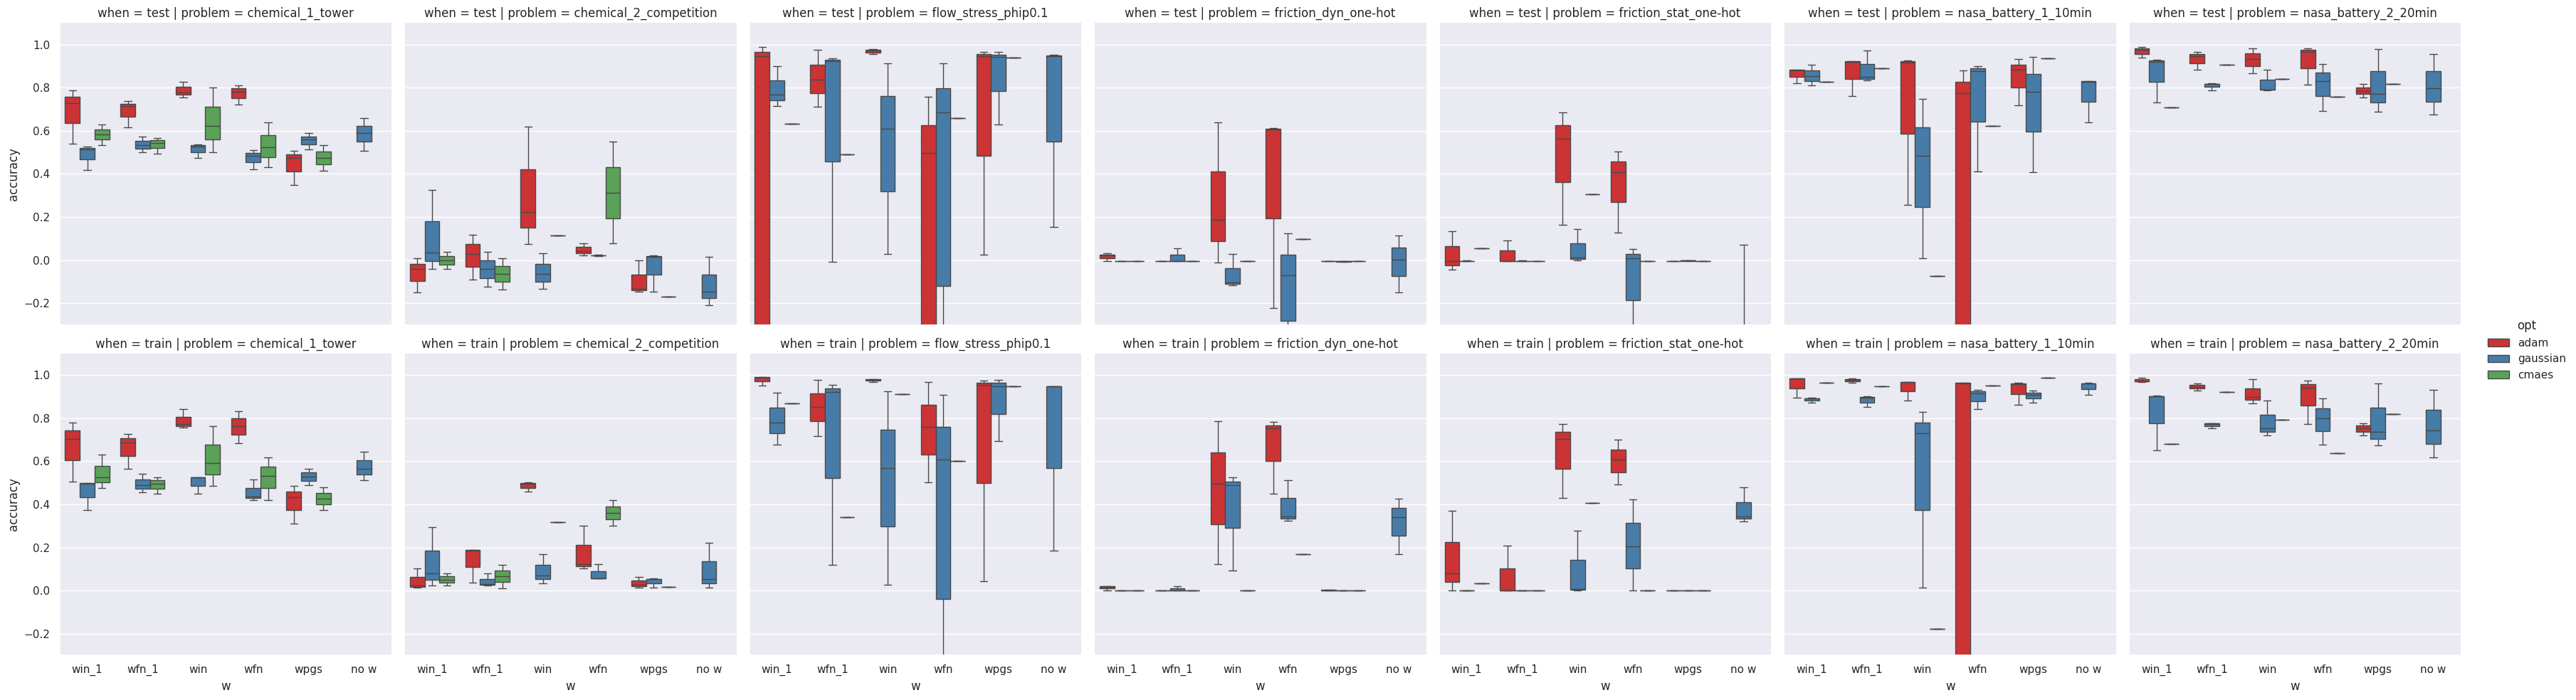

In [31]:
sns.catplot(x="w", y="accuracy", hue="opt", data=final_df, row="when", col="problem", kind="box", palette="Set1")
plt.ylim(-.3, 1.1)
plt.show()

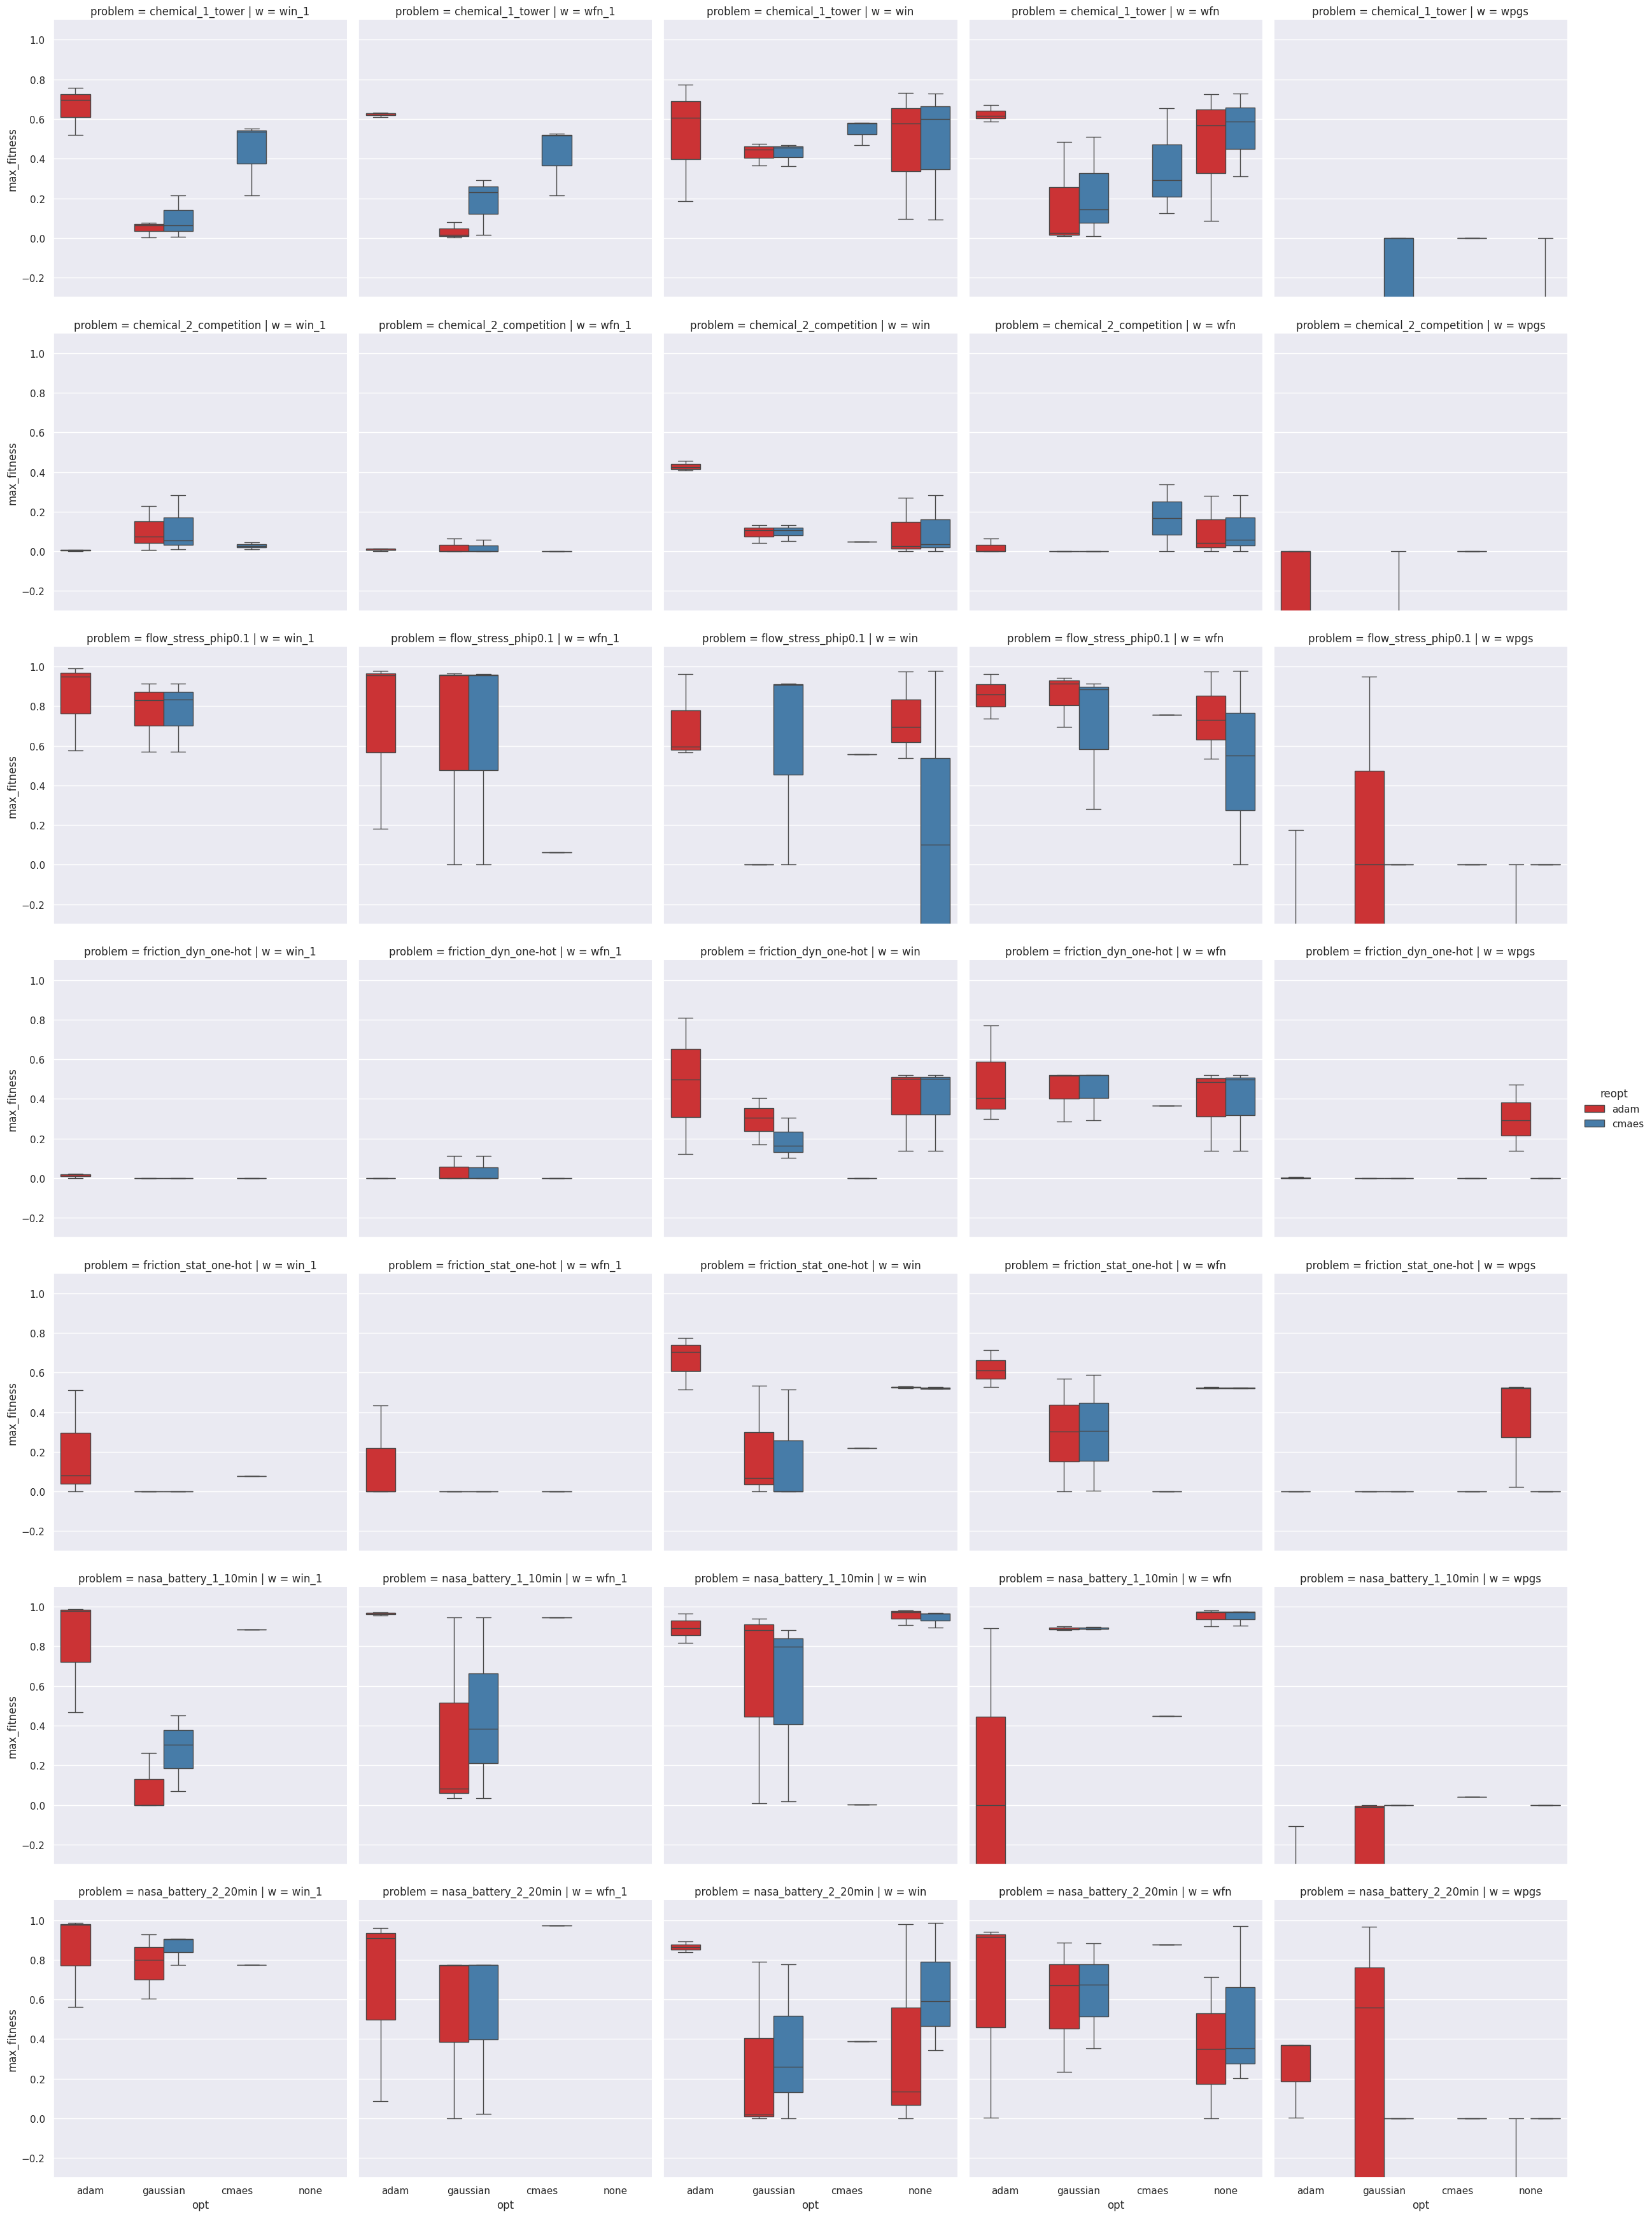

In [37]:
sns.catplot(x="opt", y="max_fitness", hue="reopt", data=reopt_df, col="w", row="problem", kind="box", palette="Set1")
plt.ylim(-.3, 1.1)
plt.show()

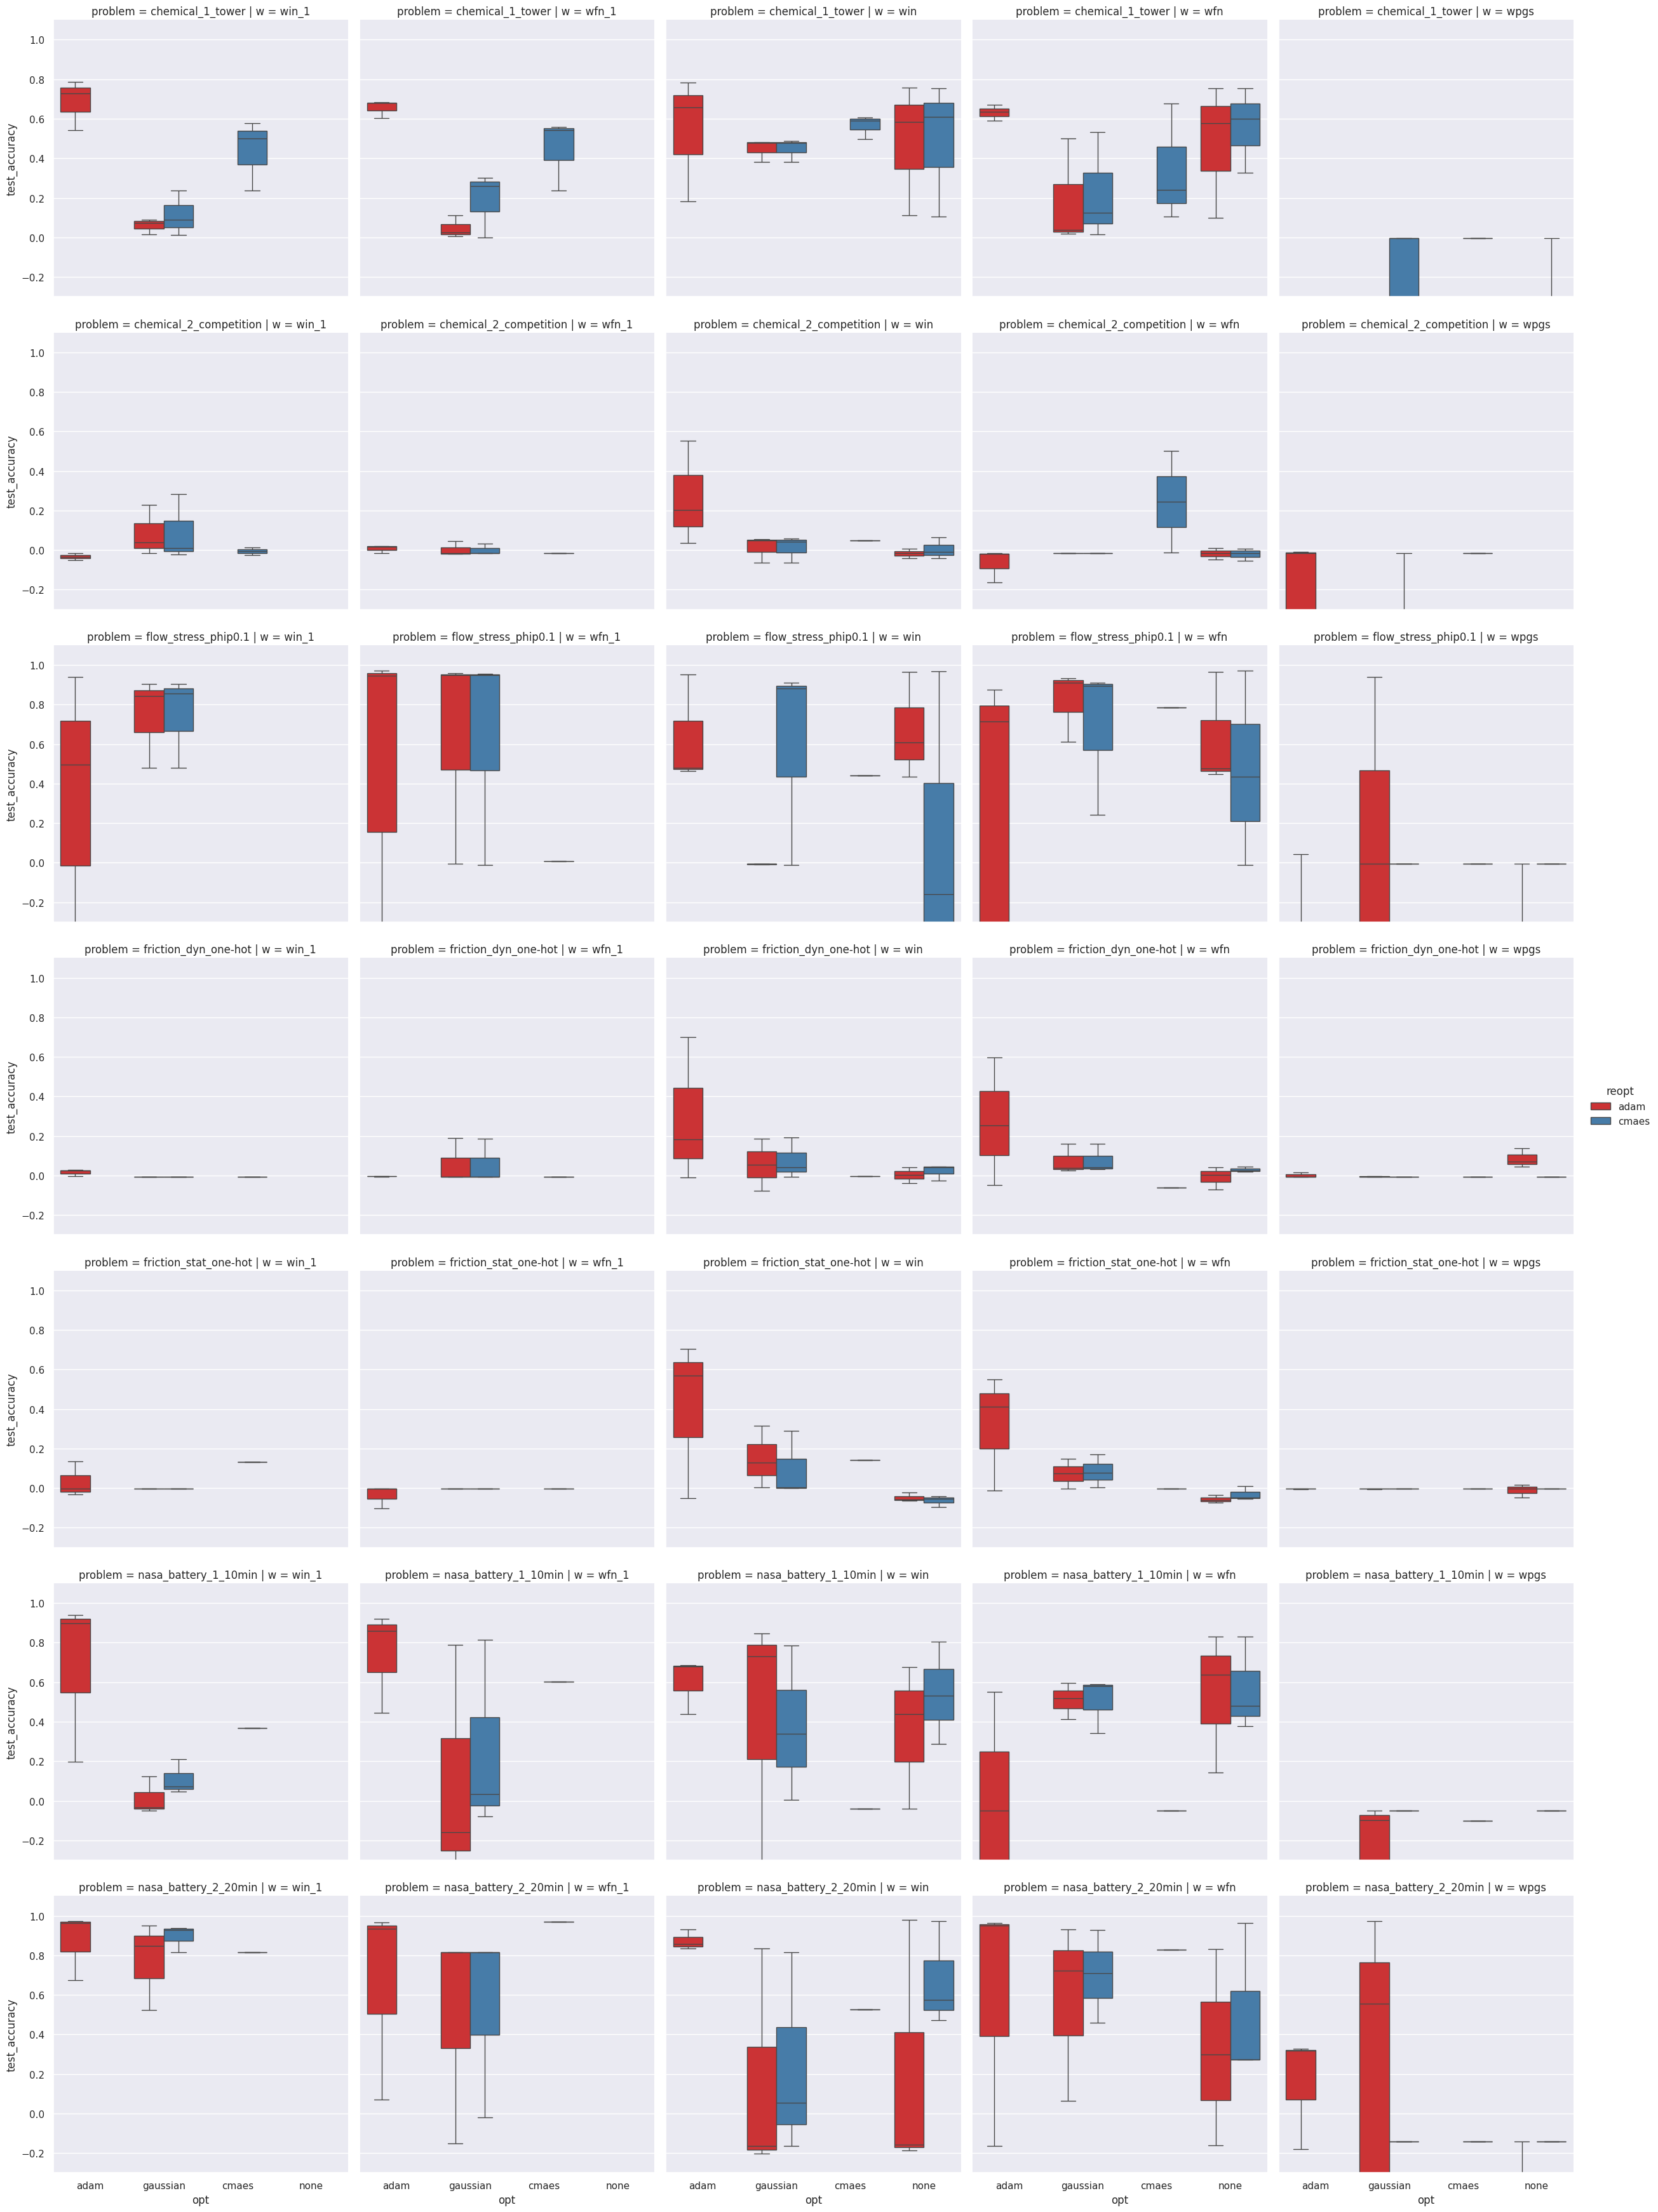

In [39]:
sns.catplot(x="opt", y="test_accuracy", hue="reopt", data=reopt_df,  col="w", row="problem", kind="box", palette="Set1")
plt.ylim(-.3, 1.1)
plt.show()

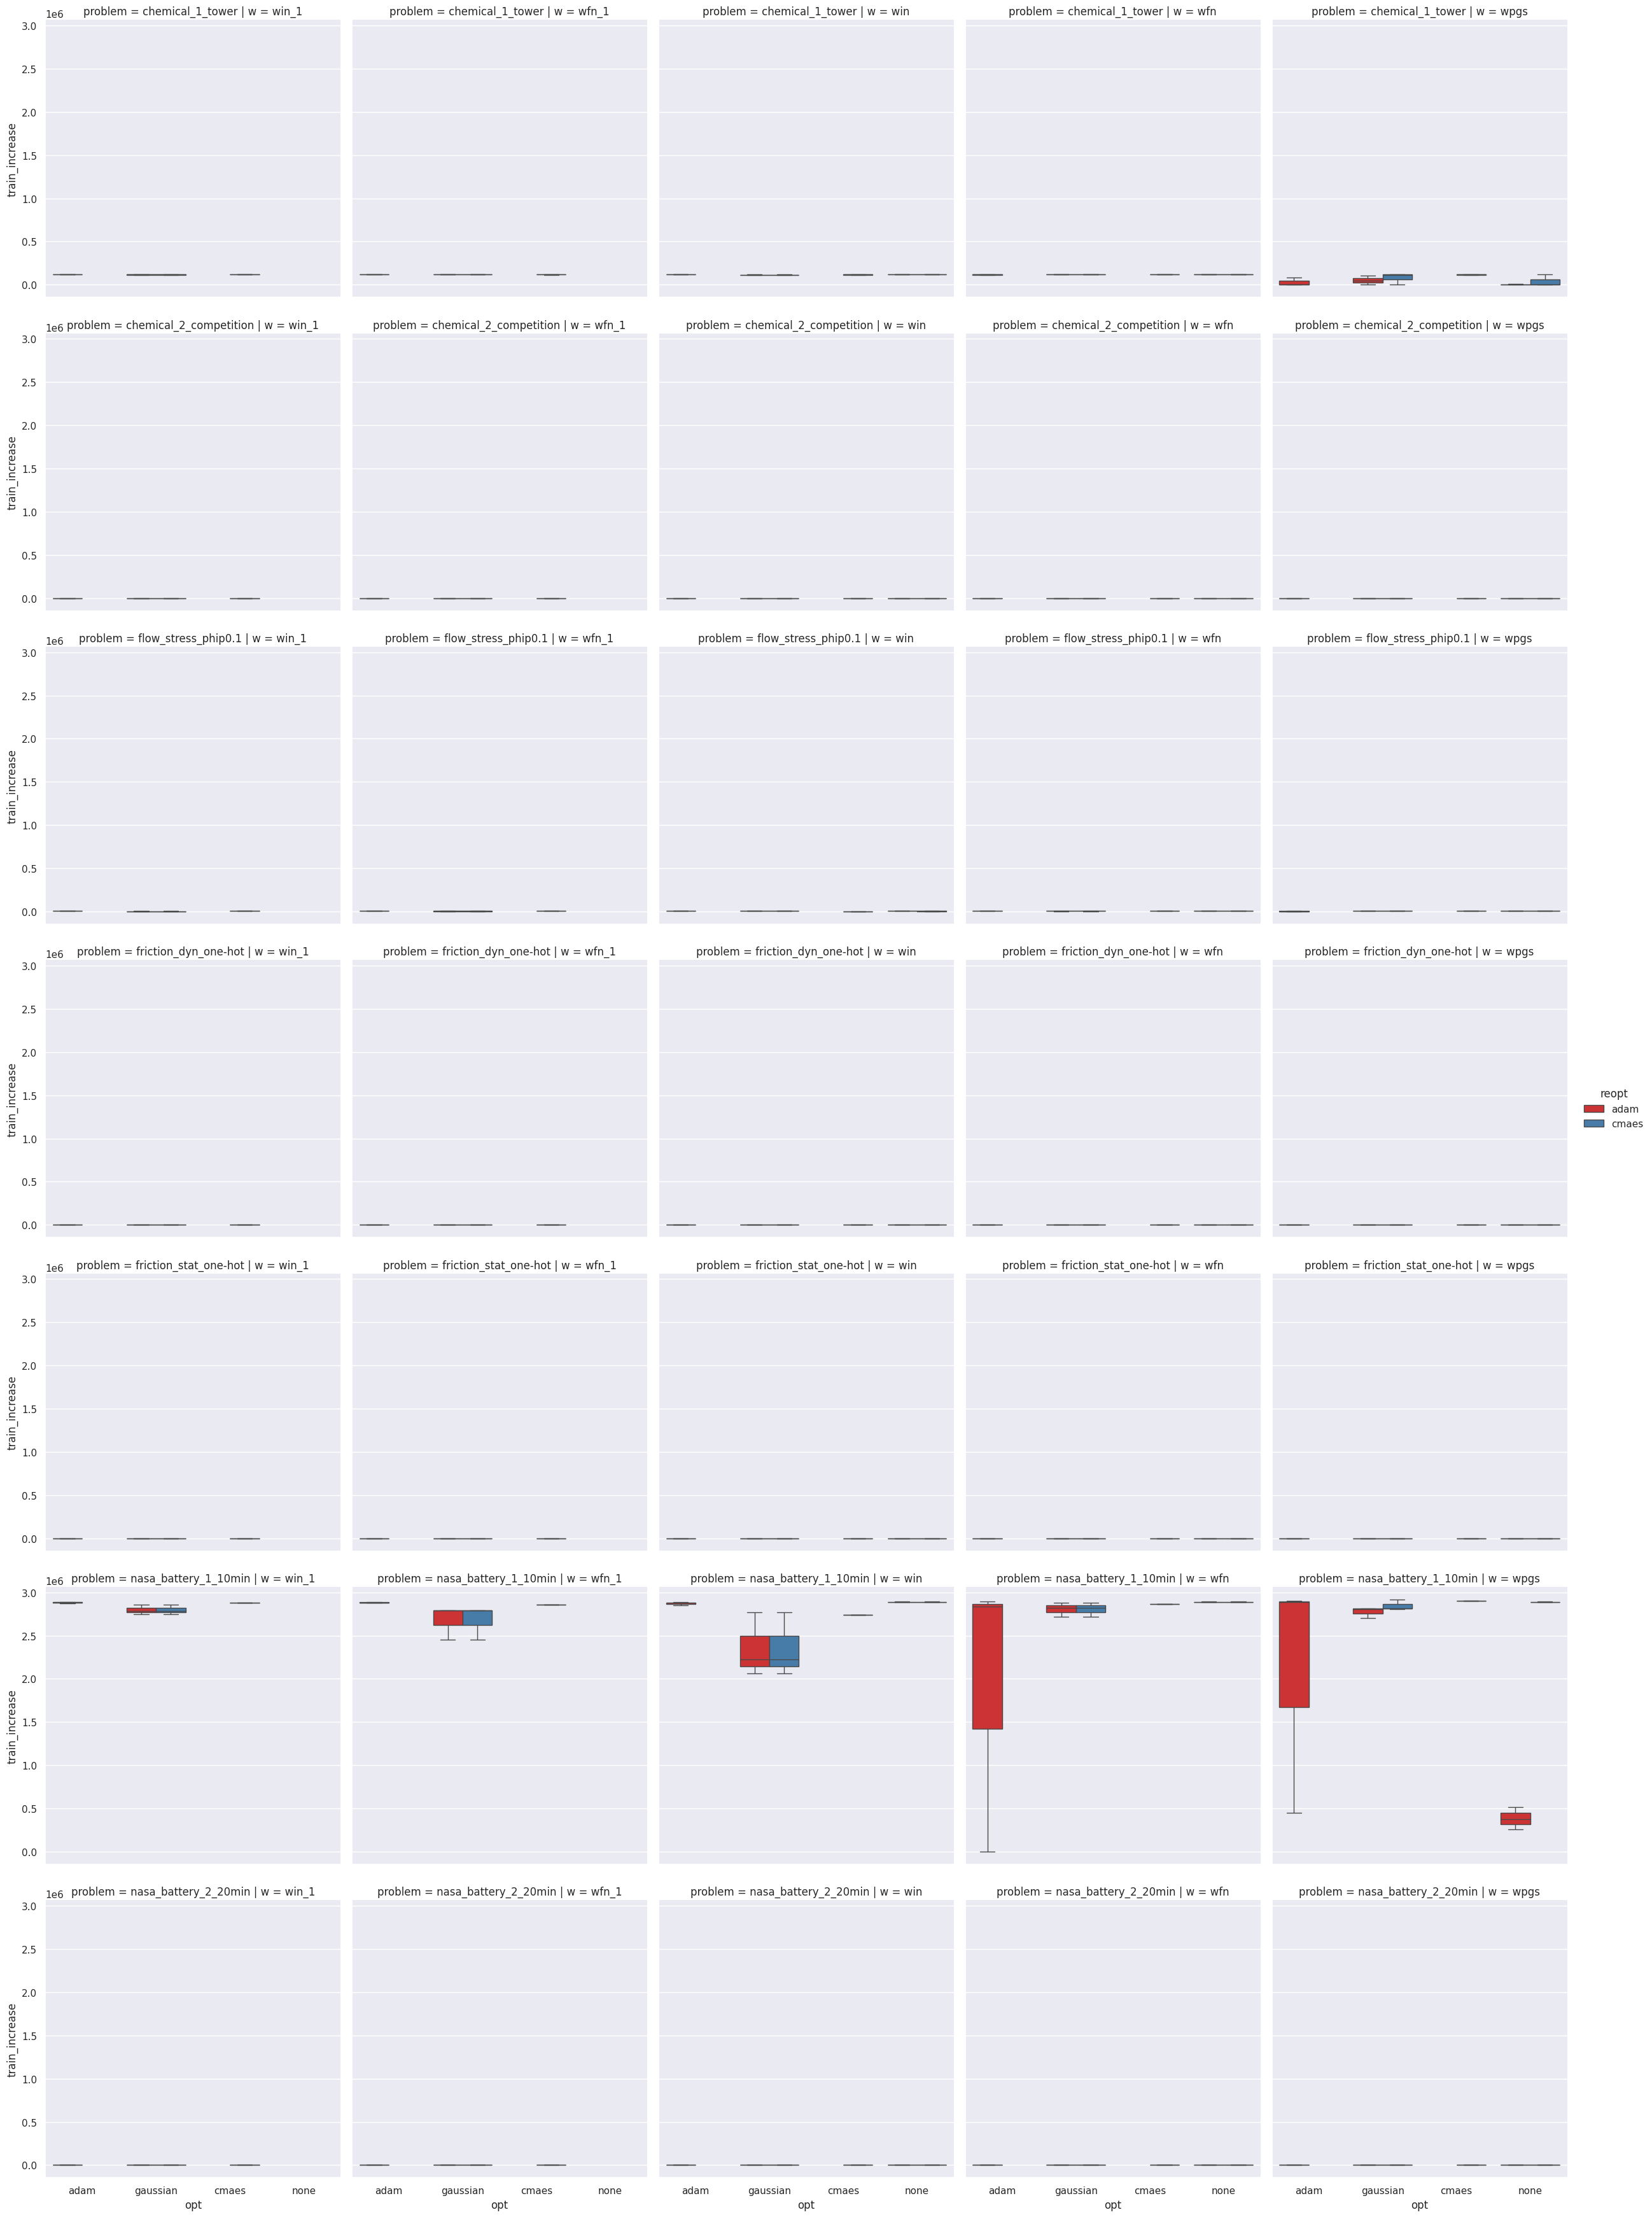

In [41]:
sns.catplot(x="opt", y="train_increase", hue="reopt", data=reopt_df, col="w", row="problem", kind="box", palette="Set1")
plt.show()

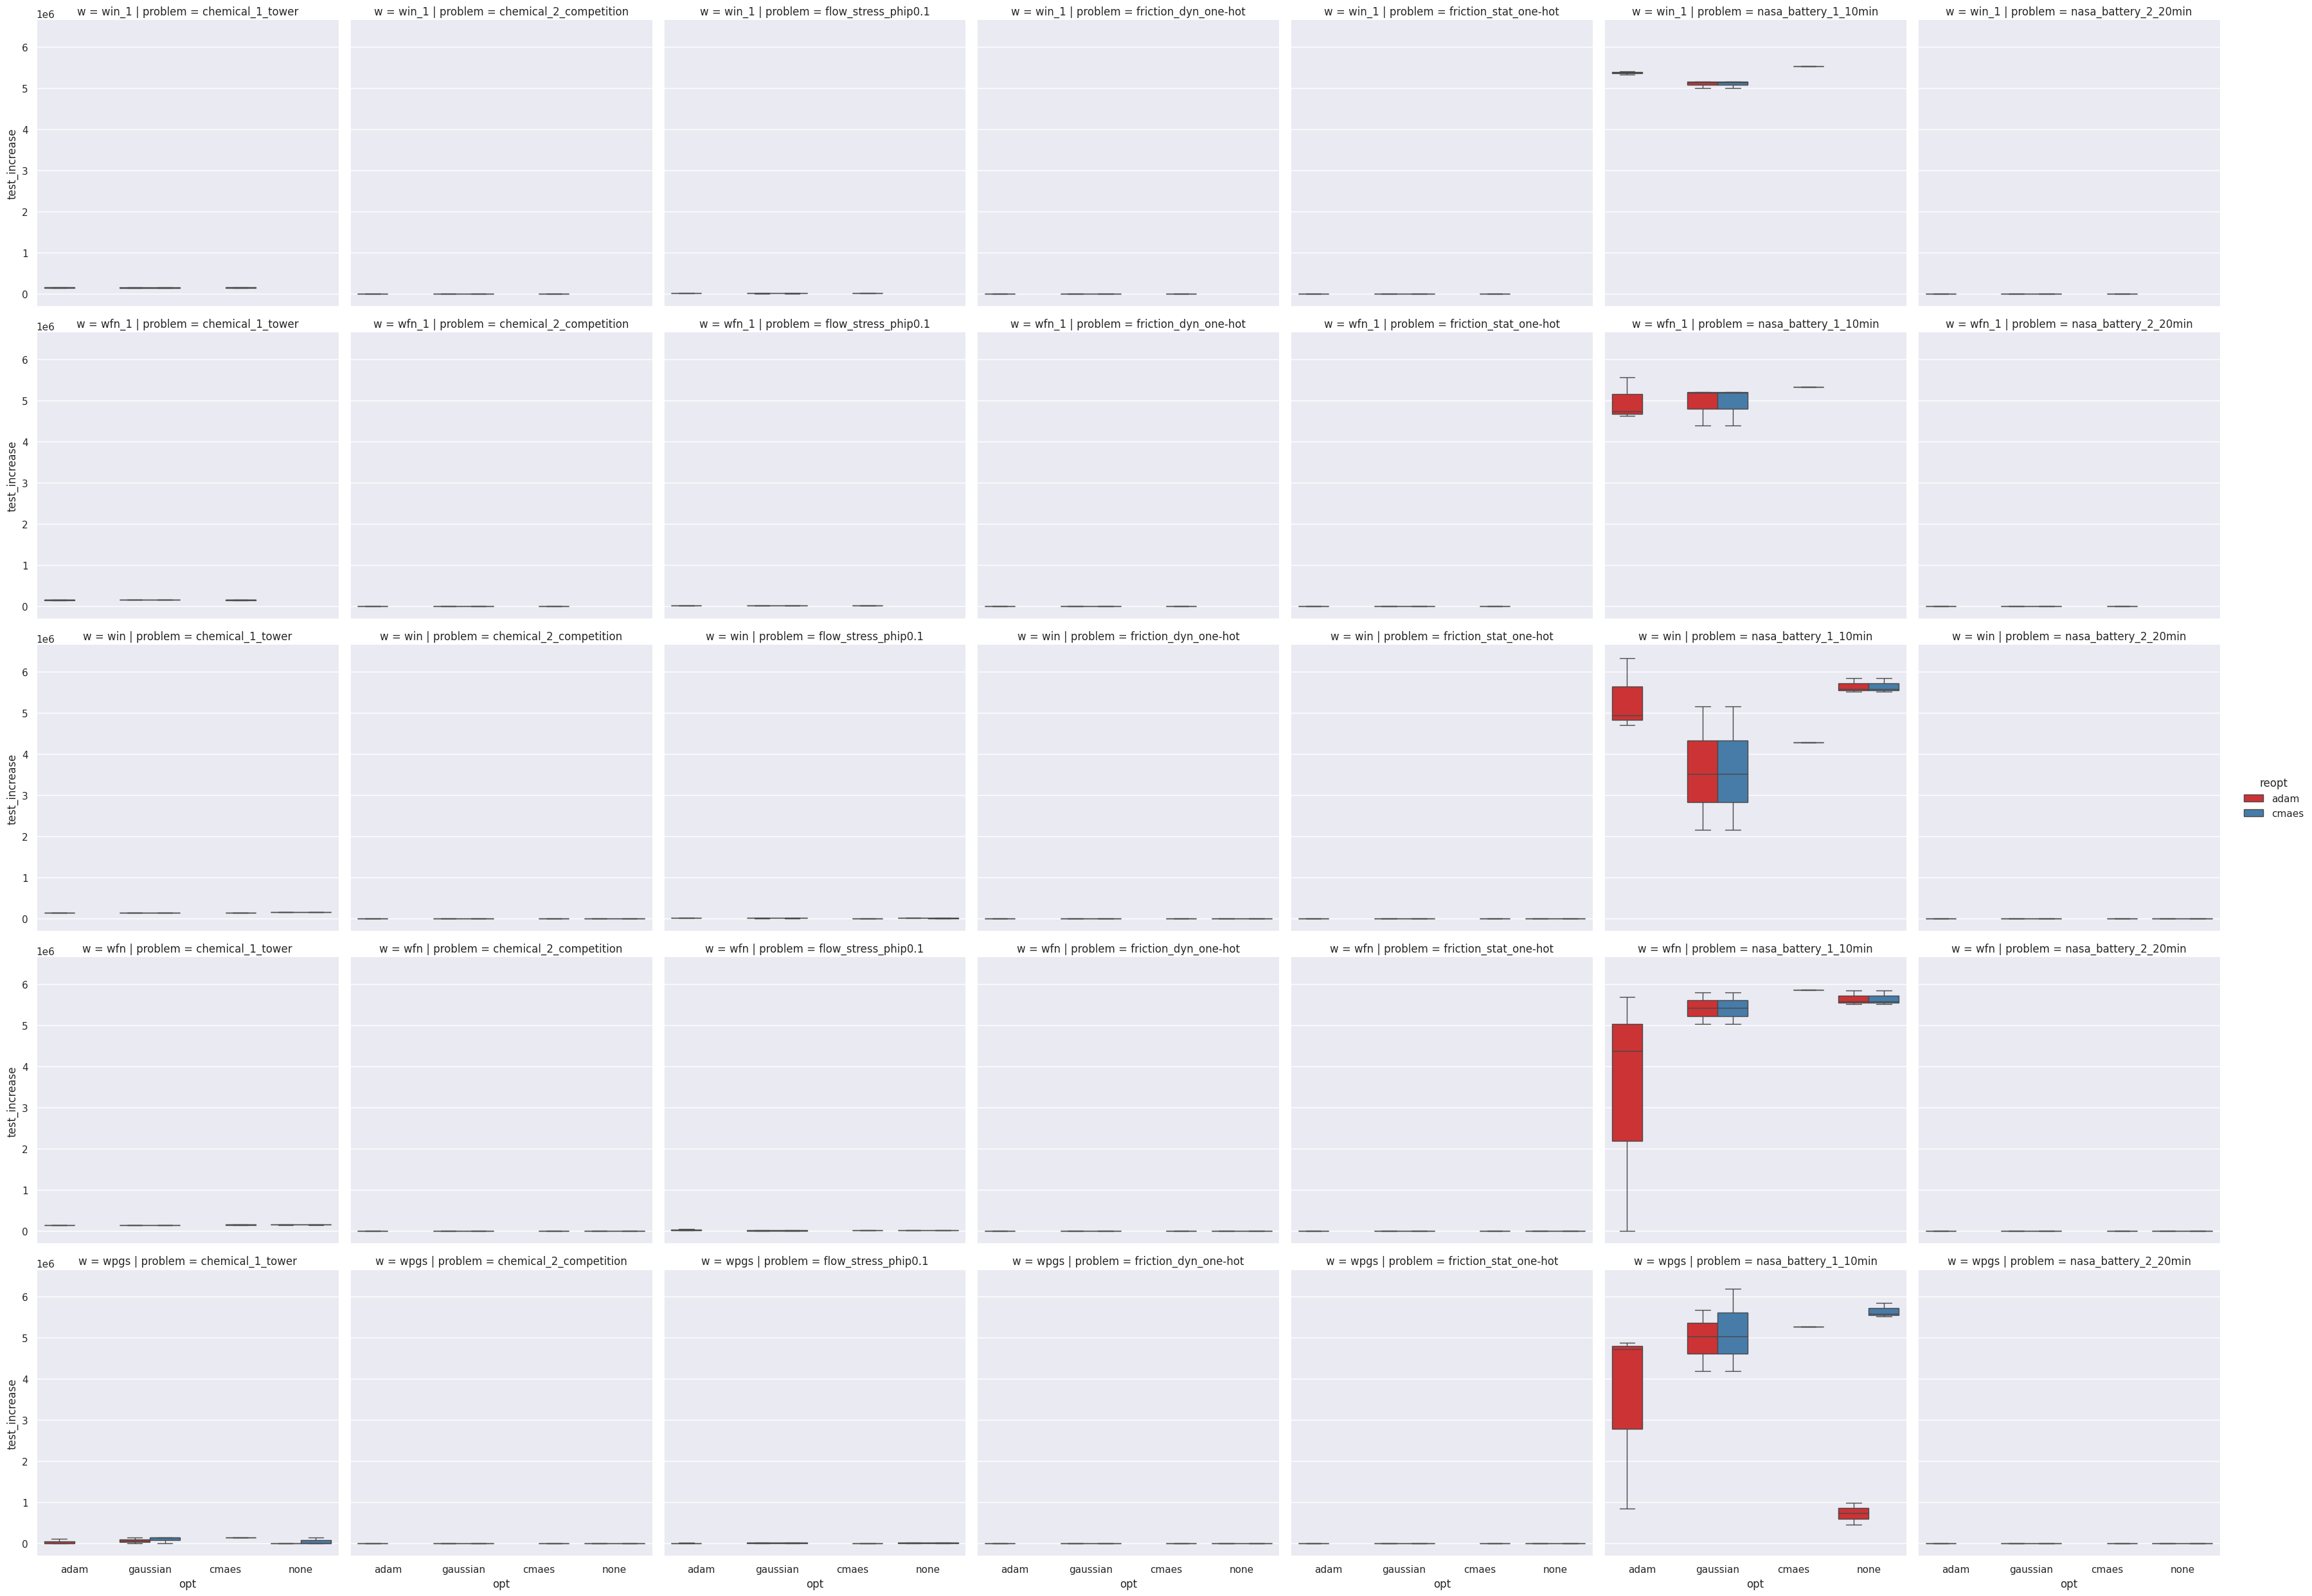

In [42]:
sns.catplot(x="opt", y="test_increase", hue="reopt", data=reopt_df, col="problem", row="w", kind="box", palette="Set1")
# plt.ylim(-.3, 1.1)
plt.show()